# Workshop IBM about the Covid

In [1]:
!wget -N https://epistat.sciensano.be/Data/COVID19BE.xlsx
!wget -N https://epistat.sciensano.be/Data/COVID19BE_HOSP.csv
!wget -N https://epistat.sciensano.be/Data/COVID19BE_MORT.csv
!wget -N https://epistat.sciensano.be/Data/COVID19BE_CASES_MUNI.csv

--2021-01-19 17:42:46--  https://epistat.sciensano.be/Data/COVID19BE.xlsx
Resolving epistat.sciensano.be (epistat.sciensano.be)... 193.190.199.10
Connecting to epistat.sciensano.be (epistat.sciensano.be)|193.190.199.10|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID19BE.xlsx’ not modified on server. Omitting download.

--2021-01-19 17:42:46--  https://epistat.sciensano.be/Data/COVID19BE_HOSP.csv
Resolving epistat.sciensano.be (epistat.sciensano.be)... 193.190.199.10
Connecting to epistat.sciensano.be (epistat.sciensano.be)|193.190.199.10|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID19BE_HOSP.csv’ not modified on server. Omitting download.

--2021-01-19 17:42:46--  https://epistat.sciensano.be/Data/COVID19BE_MORT.csv
Resolving epistat.sciensano.be (epistat.sciensano.be)... 193.190.199.10
Connecting to epistat.sciensano.be (epistat.sciensano.be)|193.190.199.10|:443... connected.
HTTP request sent, awaiting 

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_base = pd.read_excel('COVID19BE.xlsx', keep_default_na=False, na_values='', engine='openpyxl')
df_hosp = pd.read_csv('COVID19BE_HOSP.csv', keep_default_na=False, na_values='')
df_death = pd.read_csv('COVID19BE_MORT.csv', keep_default_na=False, na_values='')
df_cases = pd.read_csv('COVID19BE_CASES_MUNI.csv', keep_default_na=False, na_values='')

In [4]:
df_cases.head()

,,,,,,,,<<<<<<< HEAD
NIS5,DATE,TX_DESCR_NL,TX_DESCR_FR,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,PROVINCE,REGION,CASES
11002,2020-03-01,Antwerpen,Anvers,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5
21004,2020-03-01,Brussel,Bruxelles,Arrondissement Brussel-Hoofdstad,Arrondissement de Bruxelles-Capitale,Brussels,Brussels,<5
21009,2020-03-01,Elsene,Ixelles,Arrondissement Brussel-Hoofdstad,Arrondissement de Bruxelles-Capitale,Brussels,Brussels,<5
21014,2020-03-01,Sint-Joost-ten-Node,Saint-Josse-ten-Noode,Arrondissement Brussel-Hoofdstad,Arrondissement de Bruxelles-Capitale,Brussels,Brussels,<5


In [5]:
df_cases.isna().sum()

<<<<<<< HEAD    2
dtype: int64

In [6]:
df_base.head(10)

,DATE,PROVINCE,REGION,AGEGROUP,SEX,CASES
0,2020-03-01,Antwerpen,Flanders,40-49,M,1
1,2020-03-01,Brussels,Brussels,10-19,F,1
2,2020-03-01,Brussels,Brussels,10-19,M,1
3,2020-03-01,Brussels,Brussels,20-29,M,1
4,2020-03-01,Brussels,Brussels,30-39,F,1
5,2020-03-01,Brussels,Brussels,40-49,F,1
6,2020-03-01,Brussels,Brussels,50-59,M,1
7,2020-03-01,Liège,Wallonia,40-49,M,3
8,2020-03-01,Limburg,Flanders,70-79,M,1
9,2020-03-01,OostVlaanderen,Flanders,50-59,F,1


In [7]:
df_hosp.head(10)

,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Antwerpen,Flanders,14,50,9,4,0,8,8
1,2020-03-15,Brussels,Brussels,14,58,11,8,0,7,2
2,2020-03-15,Hainaut,Wallonia,15,56,13,11,1,26,1
3,2020-03-15,Limburg,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Liège,Wallonia,12,22,2,1,0,4,1
5,2020-03-15,Luxembourg,Wallonia,3,4,0,0,0,3,0
6,2020-03-15,Namur,Wallonia,6,2,1,1,0,0,0
7,2020-03-15,OostVlaanderen,Flanders,14,16,5,1,0,5,1
8,2020-03-15,VlaamsBrabant,Flanders,6,14,2,0,0,2,0
9,2020-03-15,BrabantWallon,Wallonia,2,5,2,2,0,1,0


In [8]:
df_death.head(10)

,DATE,REGION,AGEGROUP,SEX,DEATHS
0,2020-03-10,Brussels,85+,F,1
1,2020-03-11,Flanders,85+,M,1
2,2020-03-11,Brussels,65-74,M,1
3,2020-03-11,Brussels,85+,F,1
4,2020-03-12,Brussels,75-84,M,1
5,2020-03-13,Brussels,75-84,F,2
6,2020-03-13,Brussels,85+,M,1
7,2020-03-14,Flanders,75-84,M,1
8,2020-03-14,Brussels,65-74,M,1
9,2020-03-14,Brussels,75-84,M,1


In [9]:
df_base.isna().sum()

DATE          49
PROVINCE    3296
REGION      3296
AGEGROUP    1439
SEX          839
CASES          0
dtype: int64

In [10]:
df_base.shape

(52849, 6)

In [11]:
df_hosp.isna().sum()

DATE             0
PROVINCE         0
REGION           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
dtype: int64

In [12]:
df_hosp.shape

(3410, 10)

In [13]:
df_death.isna().sum()

DATE        0
REGION      0
AGEGROUP    0
SEX         0
DEATHS      0
dtype: int64

In [14]:
df_death.shape

(3955, 5)

## Merging the datasets

In [15]:
death = df_death.groupby(['DATE', 'REGION']).sum()
death.head(10)

DEATHS
DATE       REGION          
2020-03-10 Brussels       1
2020-03-11 Brussels       2
           Flanders       1
2020-03-12 Brussels       1
2020-03-13 Brussels       3
2020-03-14 Brussels       4
           Flanders       1
2020-03-15 Brussels       2
           Flanders       3
           Wallonia       1

In [16]:
hosp = df_hosp.groupby(['DATE', 'REGION']).sum()
hosp.head(10)

NR_REPORTING  TOTAL_IN  TOTAL_IN_ICU  TOTAL_IN_RESP  \
DATE       REGION                                                          
2020-03-15 Brussels            14        58            11              8   
           Flanders            52       119            25              9   
           Wallonia            38        89            18             15   
2020-03-16 Brussels            15        81            14             11   
           Flanders            52       159            40             20   
           Wallonia            37       130            25             20   
2020-03-17 Brussels            16       115            23             16   
           Flanders            52       223            43             26   
           Wallonia            37       159            34             24   
2020-03-18 Brussels            16       124            29             18   

                     TOTAL_IN_ECMO  NEW_IN  NEW_OUT  
DATE       REGION                                    
2020-03-15 Brussels              0       7        2  
           Flanders              0      30       14  
           Wallonia              1      34        2  
2020-03-16 Brussels              0      11        4  
           Flanders              0      45        7  
           Wallonia              1      34        3  
2020-03-17 Brussels              1      16        5  
           Flanders              1      69       20  
           Wallonia              1      37        6  
2020-03-18 Brussels              2      18        5

In [17]:
final = pd.merge(death, hosp, how='outer', on=['DATE', 'REGION'])
final.head(10)

DEATHS  NR_REPORTING  TOTAL_IN  TOTAL_IN_ICU  \
DATE       REGION                                                   
2020-03-10 Brussels     1.0           NaN       NaN           NaN   
2020-03-11 Brussels     2.0           NaN       NaN           NaN   
           Flanders     1.0           NaN       NaN           NaN   
2020-03-12 Brussels     1.0           NaN       NaN           NaN   
2020-03-13 Brussels     3.0           NaN       NaN           NaN   
2020-03-14 Brussels     4.0           NaN       NaN           NaN   
           Flanders     1.0           NaN       NaN           NaN   
2020-03-15 Brussels     2.0          14.0      58.0          11.0   
           Flanders     3.0          52.0     119.0          25.0   
           Wallonia     1.0          38.0      89.0          18.0   

                     TOTAL_IN_RESP  TOTAL_IN_ECMO  NEW_IN  NEW_OUT  
DATE       REGION                                                   
2020-03-10 Brussels            NaN            NaN     NaN      NaN  
2020-03-11 Brussels            NaN            NaN     NaN      NaN  
           Flanders            NaN            NaN     NaN      NaN  
2020-03-12 Brussels            NaN            NaN     NaN      NaN  
2020-03-13 Brussels            NaN            NaN     NaN      NaN  
2020-03-14 Brussels            NaN            NaN     NaN      NaN  
           Flanders            NaN            NaN     NaN      NaN  
2020-03-15 Brussels            8.0            0.0     7.0      2.0  
           Flanders            9.0            0.0    30.0     14.0  
           Wallonia           15.0            1.0    34.0      2.0

In [18]:
final = final.reset_index()
final.head(10)

,DATE,REGION,DEATHS,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-10,Brussels,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11,Brussels,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-11,Flanders,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-12,Brussels,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-13,Brussels,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-14,Brussels,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-14,Flanders,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-15,Brussels,2.0,14.0,58.0,11.0,8.0,0.0,7.0,2.0
8,2020-03-15,Flanders,3.0,52.0,119.0,25.0,9.0,0.0,30.0,14.0
9,2020-03-15,Wallonia,1.0,38.0,89.0,18.0,15.0,1.0,34.0,2.0


In [19]:
final.isna().sum()

DATE               0
REGION             0
DEATHS           102
NR_REPORTING       7
TOTAL_IN           7
TOTAL_IN_ICU       7
TOTAL_IN_RESP      7
TOTAL_IN_ECMO      7
NEW_IN             7
NEW_OUT            7
dtype: int64

In [20]:
final[final['DEATHS'].isna()]

,DATE,REGION,DEATHS,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
835,2020-06-14,Wallonia,NaN,37.0,87.0,12.0,5.0,1.0,4.0,3.0
836,2020-06-16,Brussels,NaN,15.0,98.0,22.0,11.0,3.0,4.0,10.0
837,2020-06-18,Brussels,NaN,15.0,93.0,19.0,9.0,3.0,5.0,9.0
838,2020-06-20,Brussels,NaN,15.0,71.0,17.0,10.0,3.0,2.0,7.0
839,2020-06-24,Brussels,NaN,15.0,53.0,15.0,7.0,2.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...
932,2020-09-22,Wallonia,NaN,37.0,138.0,25.0,13.0,2.0,16.0,15.0
933,2020-09-26,Brussels,NaN,15.0,178.0,40.0,26.0,4.0,13.0,15.0
934,2020-09-29,Brussels,NaN,15.0,221.0,46.0,32.0,2.0,30.0,25.0
935,2021-01-10,Brussels,NaN,15.0,216.0,58.0,33.0,8.0,5.0,8.0


In [21]:
final[final['DEATHS'].isna()].describe(include='all')

,DATE,REGION,DEATHS,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
count,102,102,0.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
unique,73,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-07-13,Brussels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,26.960784,71.715686,16.176471,8.813725,1.235294,6.549020,6.186275
std,NaN,NaN,NaN,13.473055,46.824589,10.112645,5.924827,1.630018,6.183061,5.541438
min,NaN,NaN,NaN,14.000000,20.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,15.000000,37.000000,10.000000,5.000000,0.000000,2.000000,2.000000
50%,NaN,NaN,NaN,15.000000,56.000000,14.000000,8.000000,1.000000,5.000000,4.000000
75%,NaN,NaN,NaN,37.000000,92.750000,22.000000,12.000000,2.000000,10.000000,10.000000


In [22]:
final['DEATHS'] = final['DEATHS'].fillna(0)

In [23]:
final[final['DEATHS'].isna()]

,DATE,REGION,DEATHS,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT


In [24]:
final = final.dropna()

In [25]:
final.isna().sum()

DATE             0
REGION           0
DEATHS           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
dtype: int64

In [26]:
final.head()

,DATE,REGION,DEATHS,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
7,2020-03-15,Brussels,2.0,14.0,58.0,11.0,8.0,0.0,7.0,2.0
8,2020-03-15,Flanders,3.0,52.0,119.0,25.0,9.0,0.0,30.0,14.0
9,2020-03-15,Wallonia,1.0,38.0,89.0,18.0,15.0,1.0,34.0,2.0
10,2020-03-16,Brussels,5.0,15.0,81.0,14.0,11.0,0.0,11.0,4.0
11,2020-03-16,Flanders,2.0,52.0,159.0,40.0,20.0,0.0,45.0,7.0


In [27]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 7 to 936
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           930 non-null    object 
 1   REGION         930 non-null    object 
 2   DEATHS         930 non-null    float64
 3   NR_REPORTING   930 non-null    float64
 4   TOTAL_IN       930 non-null    float64
 5   TOTAL_IN_ICU   930 non-null    float64
 6   TOTAL_IN_RESP  930 non-null    float64
 7   TOTAL_IN_ECMO  930 non-null    float64
 8   NEW_IN         930 non-null    float64
 9   NEW_OUT        930 non-null    float64
dtypes: float64(8), object(2)
memory usage: 79.9+ KB


In [28]:
final["DATE"] = pd.to_datetime(final["DATE"])

In [29]:
final.dtypes

DATE             datetime64[ns]
REGION                   object
DEATHS                  float64
NR_REPORTING            float64
TOTAL_IN                float64
TOTAL_IN_ICU            float64
TOTAL_IN_RESP           float64
TOTAL_IN_ECMO           float64
NEW_IN                  float64
NEW_OUT                 float64
dtype: object

## Analyze data

### Basic Plots

In [30]:
final["REGION"].value_counts()

Flanders    310
Brussels    310
Wallonia    310
Name: REGION, dtype: int64

In [31]:
final.columns

Index(['DATE', 'REGION', 'DEATHS', 'NR_REPORTING', 'TOTAL_IN', 'TOTAL_IN_ICU',
       'TOTAL_IN_RESP', 'TOTAL_IN_ECMO', 'NEW_IN', 'NEW_OUT'],
      dtype='object')

In [32]:
final_pivot = final.pivot(index="DATE",columns="REGION",values=['DEATHS', 
                                                                'TOTAL_IN', 
                                                                'TOTAL_IN_ICU',
                                                                'TOTAL_IN_RESP', 
                                                                'TOTAL_IN_ECMO', 
                                                                'NEW_IN', 
                                                                'NEW_OUT'])

In [33]:
final_pivot

DEATHS                   TOTAL_IN                   TOTAL_IN_ICU  \
REGION     Brussels Flanders Wallonia Brussels Flanders Wallonia     Brussels   
DATE                                                                            
2020-03-15      2.0      3.0      1.0     58.0    119.0     89.0         11.0   
2020-03-16      5.0      2.0      5.0     81.0    159.0    130.0         14.0   
2020-03-17      5.0      3.0      2.0    115.0    223.0    159.0         23.0   
2020-03-18      9.0      7.0      6.0    124.0    320.0    206.0         29.0   
2020-03-19      5.0     15.0     13.0    156.0    416.0    272.0         35.0   
...             ...      ...      ...      ...      ...      ...          ...   
2021-01-14      3.0     48.0     10.0    237.0   1123.0    548.0         57.0   
2021-01-15      2.0     27.0     11.0    235.0   1101.0    540.0         54.0   
2021-01-16      4.0     23.0      9.0    221.0   1081.0    516.0         54.0   
2021-01-17      1.0     20.0      4.0    235.0   1117.0    540.0         55.0   
2021-01-18      0.0      6.0      1.0    255.0   1155.0    564.0         55.0   

                             TOTAL_IN_RESP  ...          TOTAL_IN_ECMO  \
REGION     Flanders Wallonia      Brussels  ... Wallonia      Brussels   
DATE                                        ...                          
2020-03-15     25.0     18.0           8.0  ...     15.0           0.0   
2020-03-16     40.0     25.0          11.0  ...     20.0           0.0   
2020-03-17     43.0     34.0          16.0  ...     24.0           1.0   
2020-03-18     65.0     37.0          18.0  ...     29.0           2.0   
2020-03-19     77.0     53.0          24.0  ...     39.0           2.0   
...             ...      ...           ...  ...      ...           ...   
2021-01-14    177.0    112.0          32.0  ...     64.0           7.0   
2021-01-15    182.0    109.0          30.0  ...     72.0           6.0   
2021-01-16    189.0    109.0          29.0  ...     68.0           6.0   
2021-01-17    197.0    115.0          32.0  ...     65.0           7.0   
2021-01-18    198.0    116.0          27.0  ...     65.0           7.0   

                               NEW_IN                    NEW_OUT           \
REGION     Flanders Wallonia Brussels Flanders Wallonia Brussels Flanders   
DATE                                                                        
2020-03-15      0.0      1.0      7.0     30.0     34.0      2.0     14.0   
2020-03-16      0.0      1.0     11.0     45.0     34.0      4.0      7.0   
2020-03-17      1.0      1.0     16.0     69.0     37.0      5.0     20.0   
2020-03-18      1.0      1.0     18.0    111.0     50.0      5.0     34.0   
2020-03-19      1.0      1.0     33.0    107.0     67.0     12.0     19.0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-01-14     11.0      9.0     20.0     68.0     40.0     38.0     89.0   
2021-01-15     10.0     10.0     15.0     83.0     36.0     15.0     96.0   
2021-01-16     11.0      8.0     11.0     61.0     28.0     25.0     97.0   
2021-01-17     11.0      8.0      9.0     45.0     23.0      1.0     16.0   
2021-01-18     14.0      6.0     16.0     54.0     28.0     11.0     15.0   

                     
REGION     Wallonia  
DATE                 
2020-03-15      2.0  
2020-03-16      3.0  
2020-03-17      6.0  
2020-03-18      9.0  
2020-03-19     18.0  
...             ...  
2021-01-14     49.0  
2021-01-15     39.0  
2021-01-16     44.0  
2021-01-17      5.0  
2021-01-18      3.0  

[310 rows x 21 columns]

##### Warrior's path

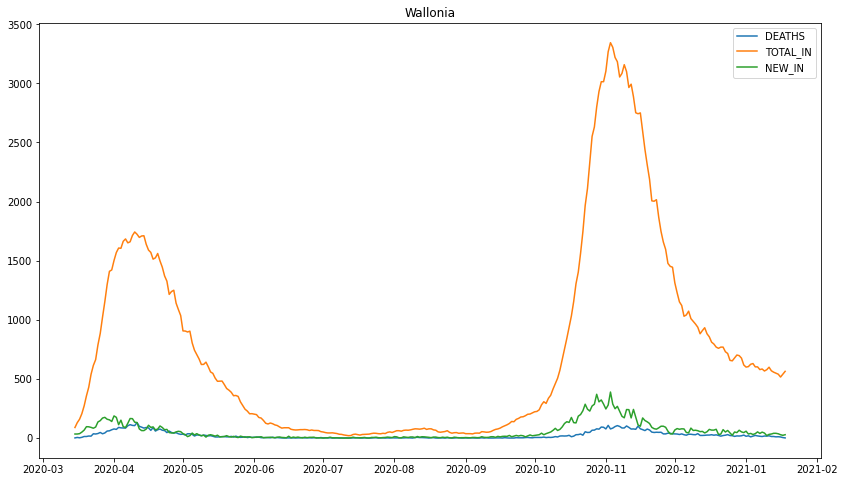

In [34]:
region = "Wallonia"

plt.figure(figsize=(14,8))
fig = plt.plot(final_pivot["DEATHS"][region])
plt.plot(final_pivot["TOTAL_IN"][region])
plt.plot(final_pivot["NEW_IN"][region])
plt.title(region)
plt.legend(["DEATHS","TOTAL_IN","NEW_IN"])

##### mage's path

Text(0.5, 1.0, 'Brussels')

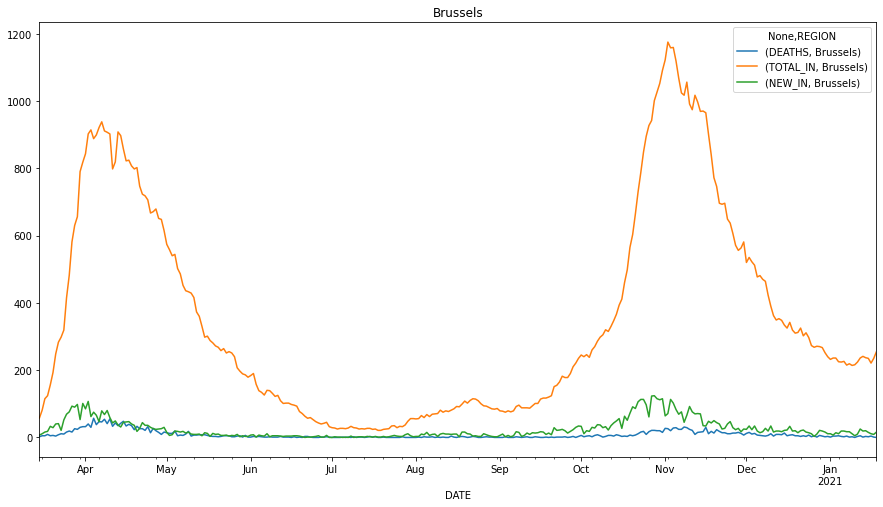

In [35]:
region = 'Brussels'
final_pivot[[('DEATHS', 'Brussels'), ('TOTAL_IN', 'Brussels'), ('NEW_IN', 'Brussels')]].plot(figsize=(15,8))
plt.title(region)

Text(0.5, 1.0, 'Wallonia')

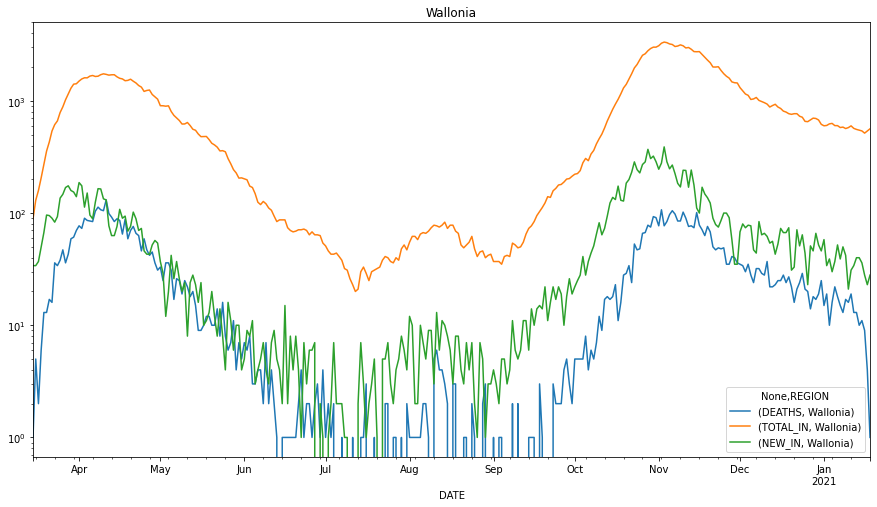

In [36]:
region = 'Wallonia'
final_pivot[[('DEATHS', region), ('TOTAL_IN', region), ('NEW_IN', region)]
           ].plot(logy=True,figsize=(15,8))
plt.title(region)

Text(0.5, 1.0, 'Wallonia')

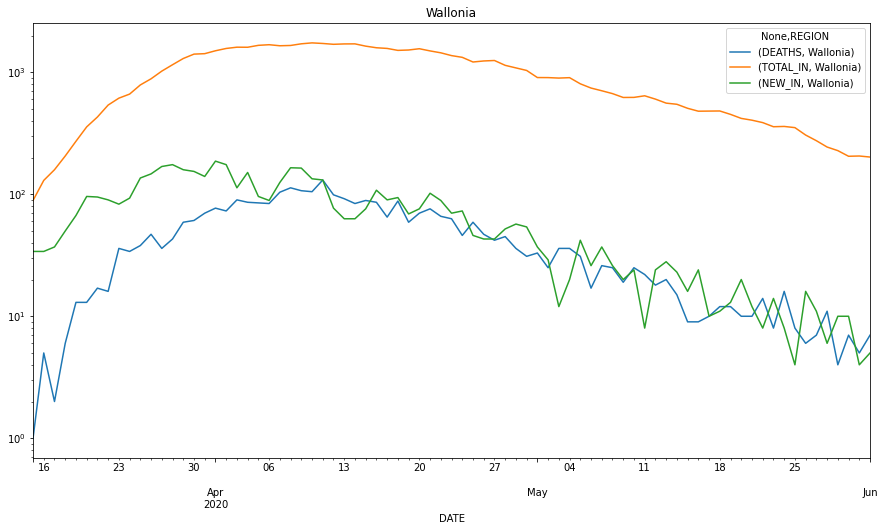

In [37]:
region = 'Wallonia'
final_pivot[[('DEATHS', region), ('TOTAL_IN', region), ('NEW_IN', region)]
           ].loc['20200301':'20200601'].plot(logy=True,figsize=(15,8))
plt.title(region)

Text(0.5, 1.0, 'Wallonia')

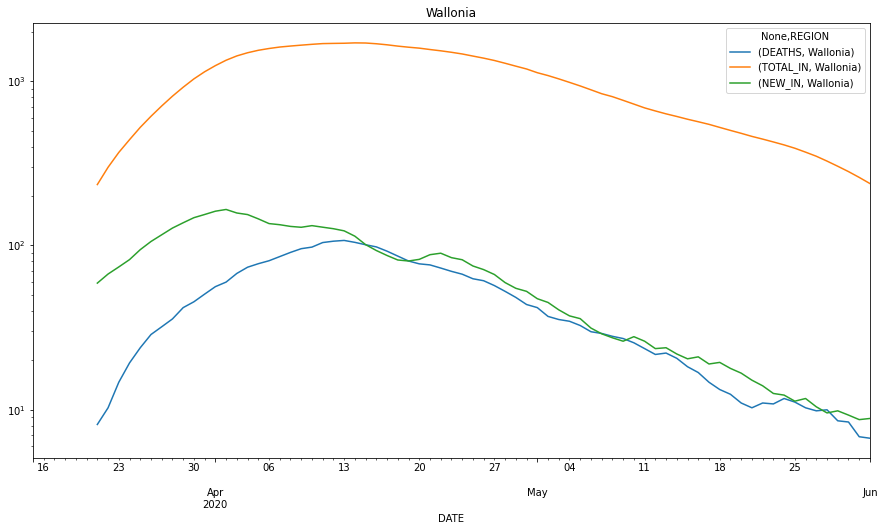

In [38]:
region = 'Wallonia'
final_pivot[[('DEATHS', region), ('TOTAL_IN', region), ('NEW_IN', region)]
           ].rolling(7).mean().loc['20200301':'20200601'].plot(logy=True,figsize=(15,8))
plt.title(region)

### In depth Analyzes

Text(0.5, 1.0, 'Relative growth (1st wave)')

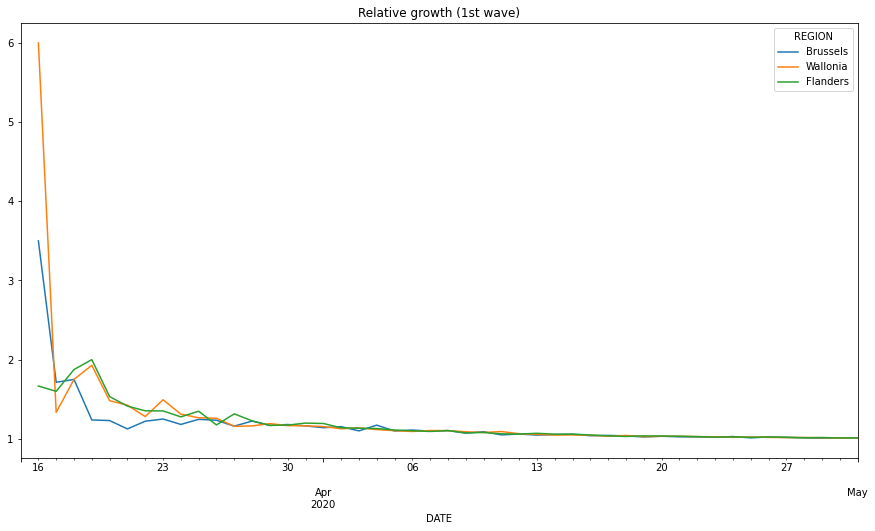

In [39]:
(final_pivot.cumsum() / final_pivot.shift(1).cumsum(
    ))['DEATHS'][['Brussels', 'Wallonia', 'Flanders']].loc['20200315':'20200501'].plot(figsize=(15,8))
plt.title("Relative growth (1st wave)")

Text(0.5, 1.0, 'Relative growth (2nd wave)')

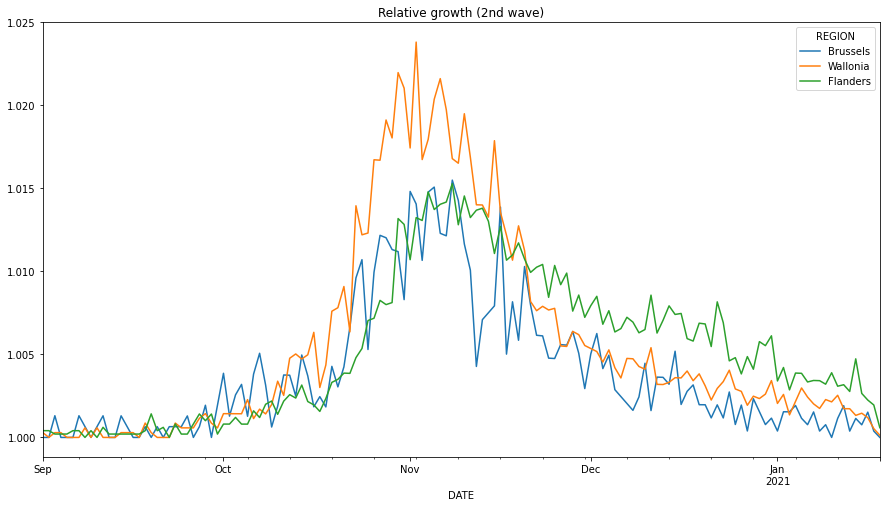

In [40]:
(final_pivot.cumsum() / final_pivot.shift(1).cumsum(
    ))['DEATHS'][['Brussels', 'Wallonia', 'Flanders']].loc['20200901':].plot(figsize=(15,8))
plt.title("Relative growth (2nd wave)")

Text(0.5, 1.0, 'Deaths rate by hospitalization (1st wave)')

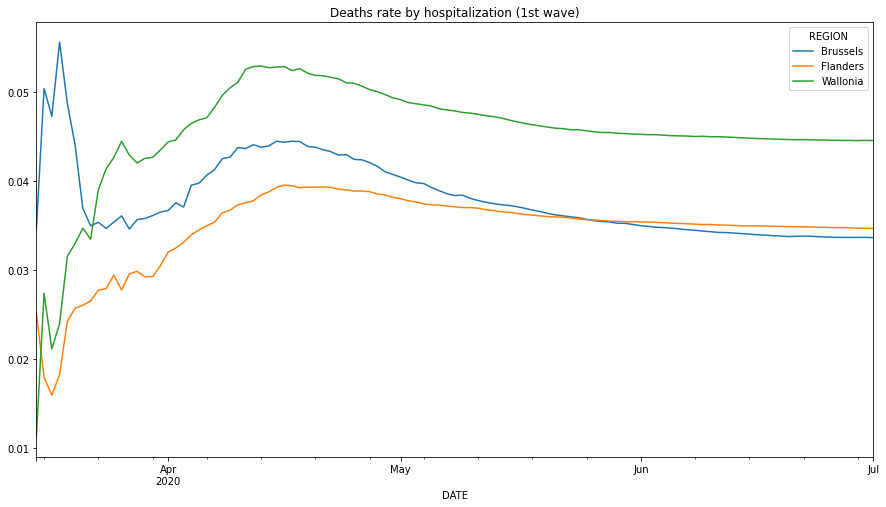

In [41]:
(final_pivot['DEATHS'].cumsum() / final_pivot['TOTAL_IN'].cumsum()
 ).loc['20200314':'20200701'].plot(figsize=(15,8))
plt.title("Deaths rate by hospitalization (1st wave)")

Text(0.5, 1.0, 'Deaths rate by hospitalization (2nd wave)')

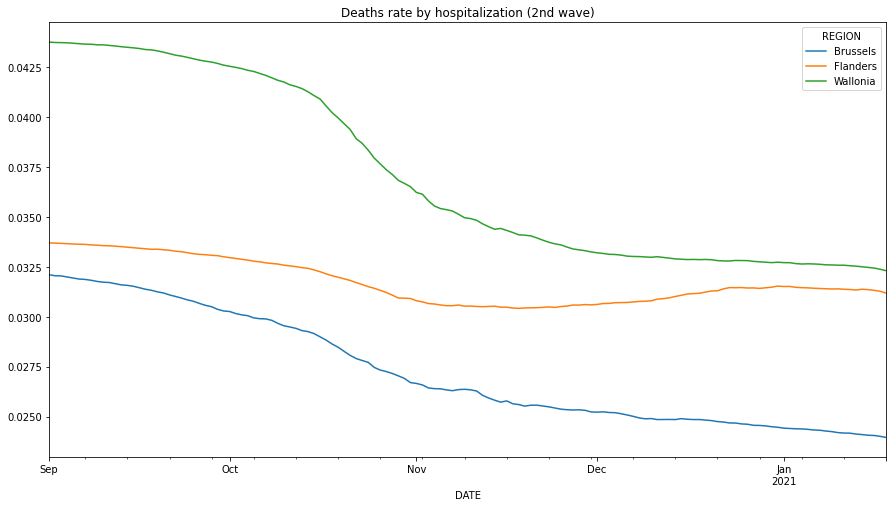

In [42]:
(final_pivot['DEATHS'].cumsum() / final_pivot['TOTAL_IN'].cumsum()
 ).loc['20200901':].plot(figsize=(15,8))
plt.title("Deaths rate by hospitalization (2nd wave)")

##### Why :
- How to explain Brussels spike and difference with the other regions?
- How to explain Wallonie death rate changes?

### Focus on severity

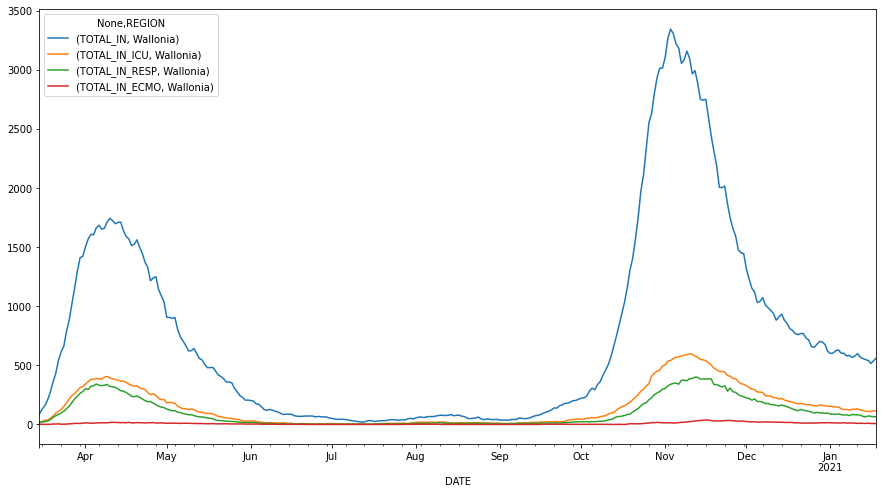

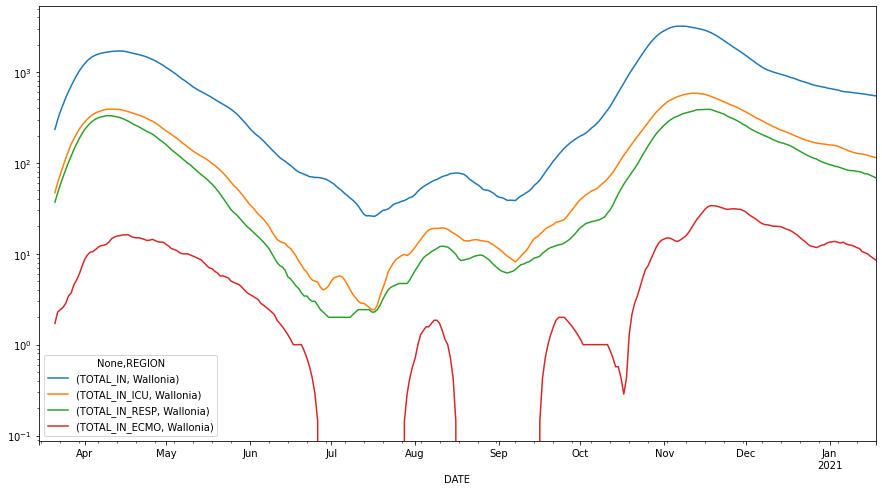

In [43]:
region = "Wallonia"
final_pivot[[('TOTAL_IN', region), ('TOTAL_IN_ICU', region), 
             ('TOTAL_IN_RESP', region), ('TOTAL_IN_ECMO', region)]].plot(figsize=(15,8))
final_pivot[[('TOTAL_IN', region), ('TOTAL_IN_ICU', region), 
             ('TOTAL_IN_RESP', region), ('TOTAL_IN_ECMO', region)]
           ].rolling(7).mean().plot(logy=True,figsize=(15,8))

plt.show()

##### Notes 
- TOTAL_IN_ICU = Total number of lab-confirmed hospitalized patients in ICU at the moment of reporting (prevalence)
- TOTAL_IN_RESP  = Total number of lab-confirmed hospitalized patients on ECMO at the moment of reporting (prevalence)
- NEW_IN  = Number of new lab-confirmed hospital intakes in the last 24h (incidence) not referred to another hospital
- NEW_OUT = Number of new lab-confirmed hospital discharges (alive) in the last 24h(incidence) not referred to another hospital

### Comparison in and out

In [44]:
final_pivot.head(2)

DEATHS                   TOTAL_IN                   TOTAL_IN_ICU  \
REGION     Brussels Flanders Wallonia Brussels Flanders Wallonia     Brussels   
DATE                                                                            
2020-03-15      2.0      3.0      1.0     58.0    119.0     89.0         11.0   
2020-03-16      5.0      2.0      5.0     81.0    159.0    130.0         14.0   

                             TOTAL_IN_RESP  ...          TOTAL_IN_ECMO  \
REGION     Flanders Wallonia      Brussels  ... Wallonia      Brussels   
DATE                                        ...                          
2020-03-15     25.0     18.0           8.0  ...     15.0           0.0   
2020-03-16     40.0     25.0          11.0  ...     20.0           0.0   

                               NEW_IN                    NEW_OUT           \
REGION     Flanders Wallonia Brussels Flanders Wallonia Brussels Flanders   
DATE                                                                        
2020-03-15      0.0      1.0      7.0     30.0     34.0      2.0     14.0   
2020-03-16      0.0      1.0     11.0     45.0     34.0      4.0      7.0   

                     
REGION     Wallonia  
DATE                 
2020-03-15      2.0  
2020-03-16      3.0  

[2 rows x 21 columns]

Text(0.5, 1.0, 'In and Out - 1st Wave')

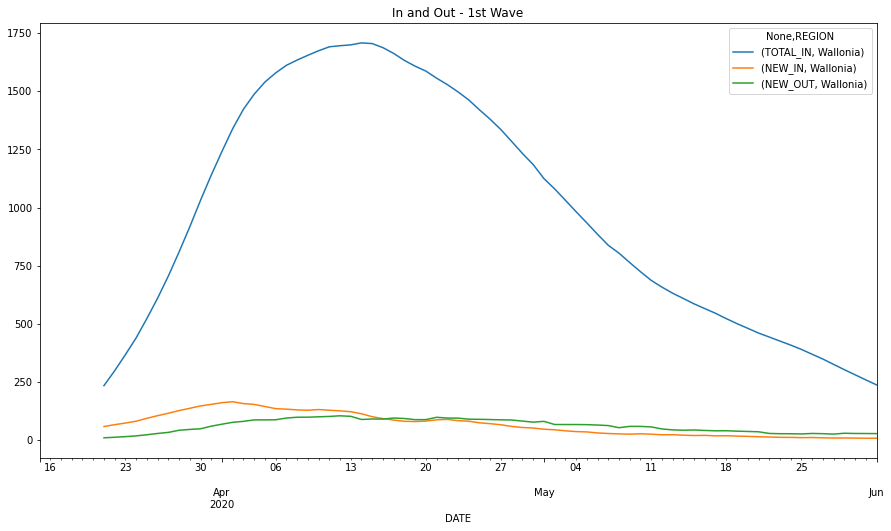

In [45]:
region = "Wallonia"
final_pivot[[('TOTAL_IN', region), ('NEW_IN', region), 
             ('NEW_OUT', region)]].rolling(7).mean().loc[:"20200601"].plot(figsize=(15,8))
plt.title("In and Out - 1st Wave")

Text(0.5, 1.0, 'In and Out - 2nd Wave')

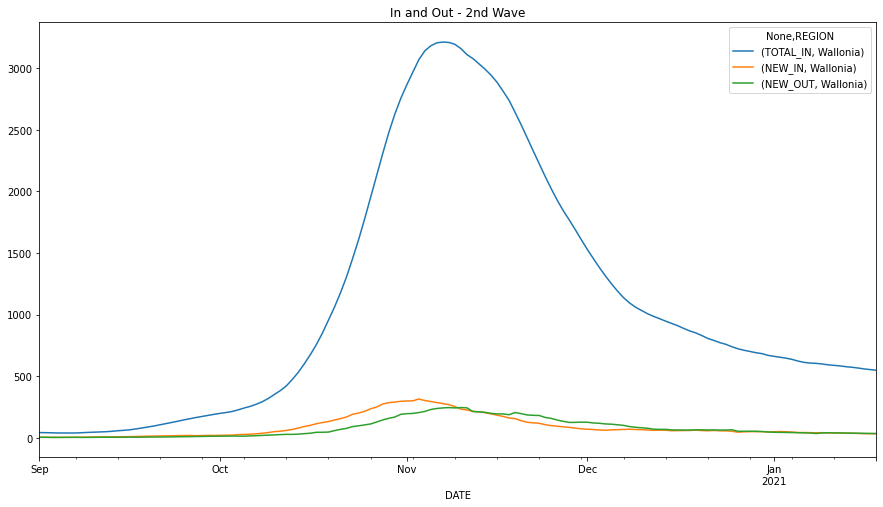

In [46]:
region = "Wallonia"
final_pivot[[('TOTAL_IN', region), ('NEW_IN', region), 
             ('NEW_OUT', region)]].rolling(7).mean().loc["20200901":].plot(figsize=(15,8))
plt.title("In and Out - 2nd Wave")

### Remarks :

- High number of admission at the beginning of the crisis, hospitals are crowded.
- Second wave highest > first wave highest
- Longer time to recover